In [1]:
import matplotlib, os; matplotlib.rcParams["savefig.directory"] = "."
import numpy as np
import pylab as plt
import pandas as pd
import sklearn as skl
import matplotlib
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})

In [2]:
lhc_sizes = (4,5,6,7,8,9,10,11,12,13)#,14,16)
feature_names = [f"f{_}" for _ in range(10)]
target_names = ["Keq","dqnet"]
X, Y = np.zeros((0,10)), np.zeros((0,2))

for lhc_size in lhc_sizes:
    data = np.load(f"lhc_{lhc_size}.npy")
    assert np.isfinite(data[:,:10]).all()
    X = np.vstack((X,data[:,:10]))
    Y = np.vstack((Y,data[:,-2:]))    
Y[:,0] = np.log10(Y[:,0]) # take the log of the Keq as the data is bunched at the origin

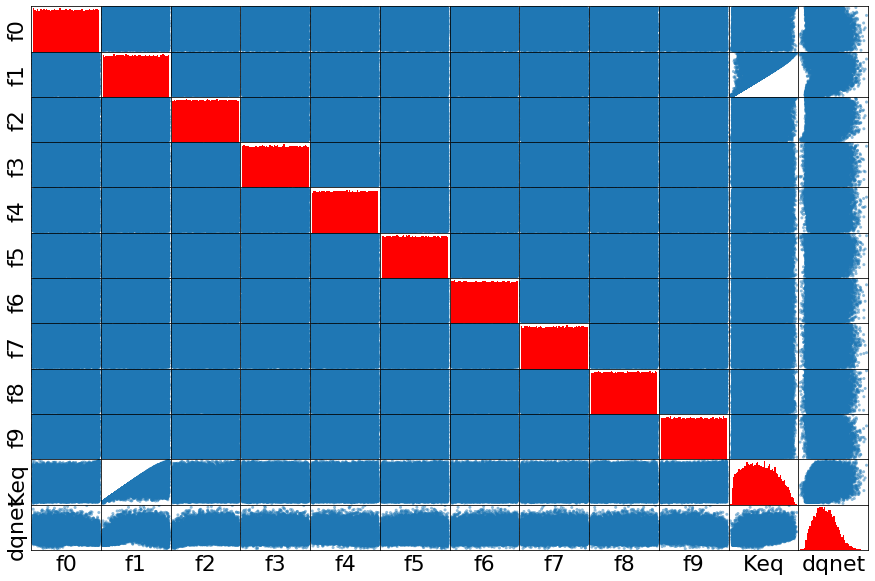

In [5]:
df = pd.DataFrame(np.hstack((X,Y)), columns=feature_names+target_names)
sm = pd.plotting.scatter_matrix(df, hist_kwds={"bins": 50, "color": "red"}, diagonal='hist')
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.show()

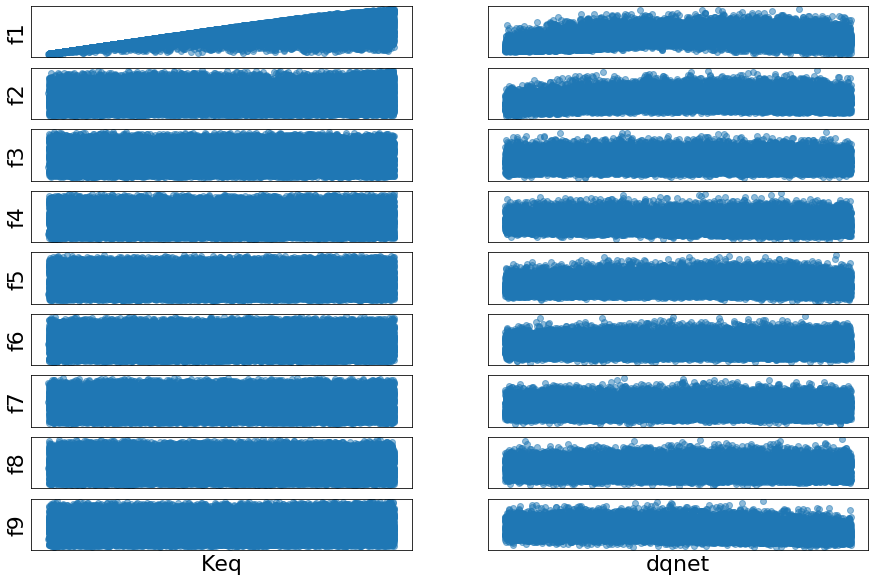

In [6]:
def scatter(df, inputs, outputs, ticks=False):
    inputs,outputs = outputs,inputs
    nx, ny = len(inputs), len(outputs)
    cols = df.columns
    i=0
    for j in inputs:
        for k in outputs:
            i+=1
            plt.subplot(nx,ny,i)
            if j==k:
                plt.hist(df[cols[j]], color="red", bins=500)
            else:
                plt.plot(df[cols[j]], df[cols[k]], "o", alpha=0.5)
            if not ticks:
                plt.xticks([])
                plt.yticks([])
            
            if k==outputs[0]: plt.ylabel(cols[j])
            if j==inputs[-1]: plt.xlabel(cols[k])
scatter(df, [10,11], [1,2,3,4,5,6,7,8,9])
plt.show()

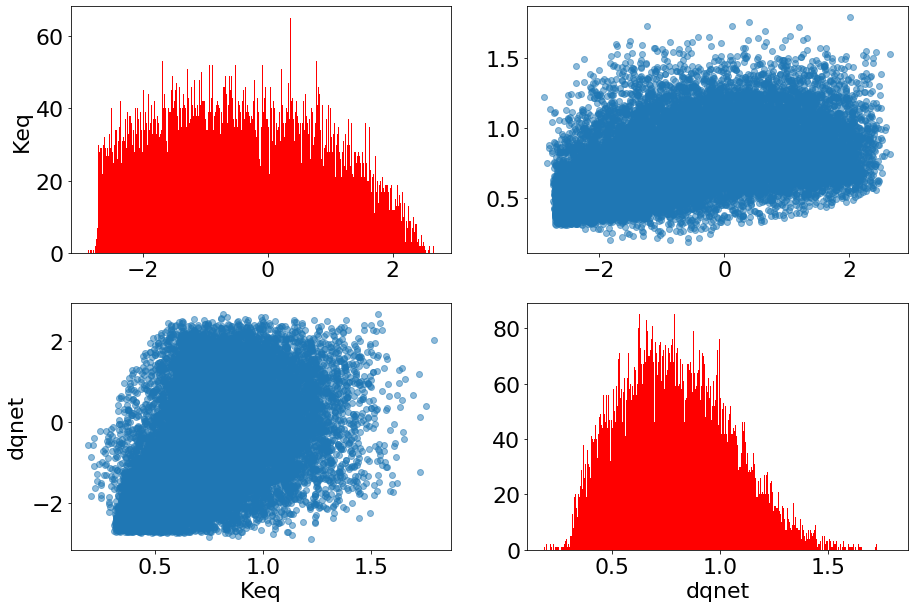

In [7]:
scatter(df, [10,11], [10,11], ticks=True)
plt.show()

In [8]:
np.save("X.npy", X)
np.save("Y.npy", Y)

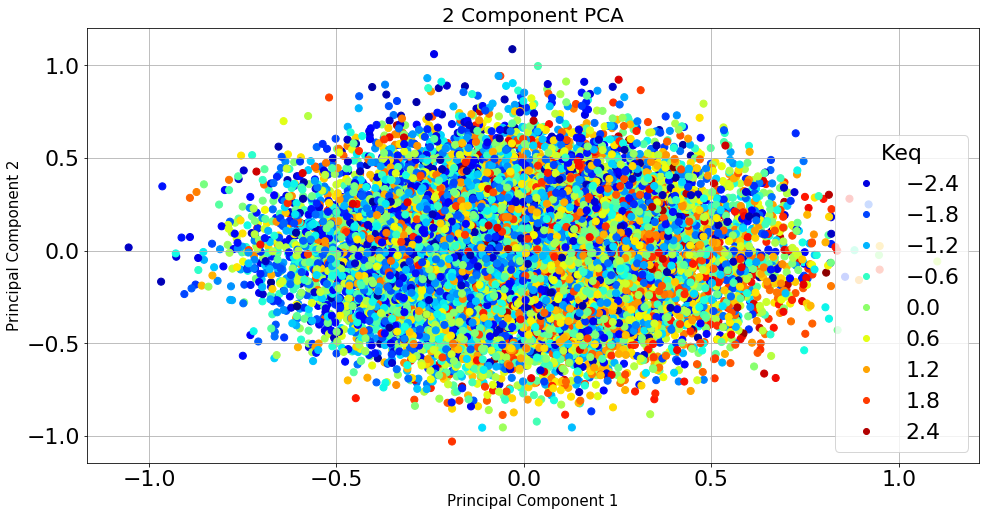

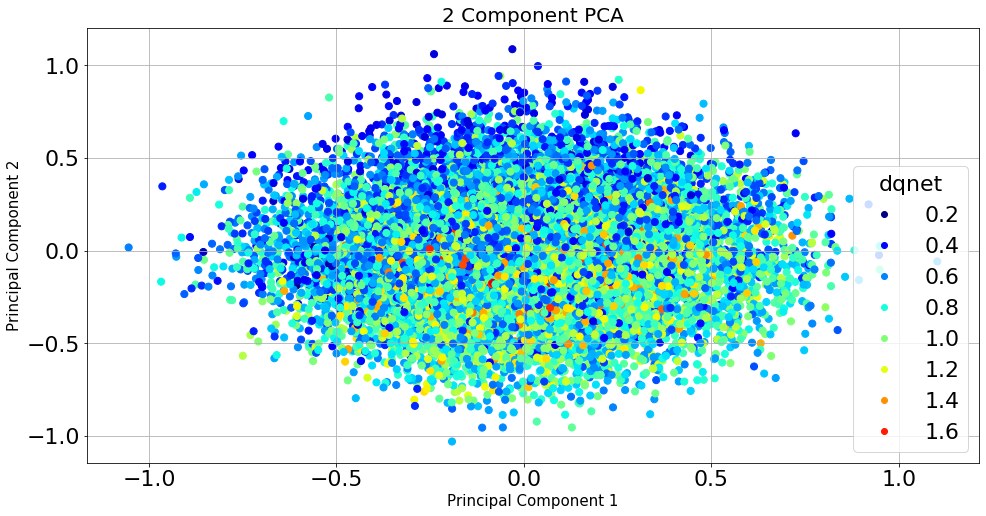

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df['Keq']], axis = 1)
finalDf.head(5)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


scatter = ax.scatter(finalDf['principal component 1']
           , finalDf['principal component 2']
           , c = df['Keq'], cmap='jet'
           , s = 50)

ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Keq")
ax.grid()

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


scatter = ax.scatter(finalDf['principal component 1']
           , finalDf['principal component 2']
           , c = df['dqnet'], cmap='jet'
           , s = 50)

ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="dqnet")
ax.grid()



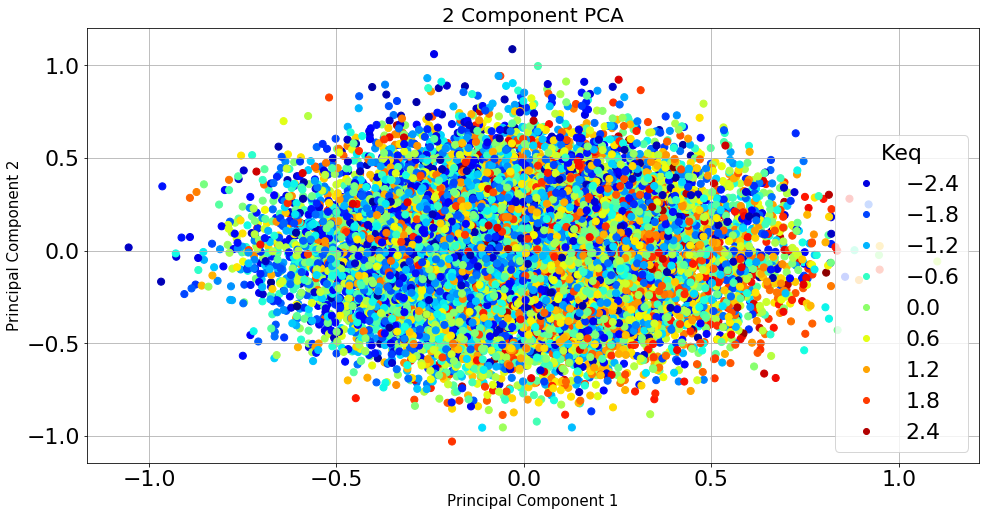

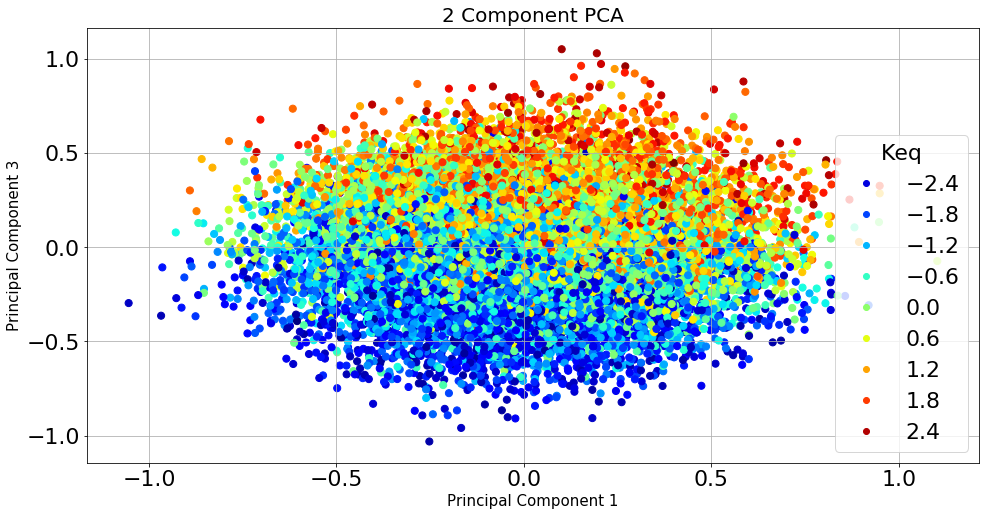

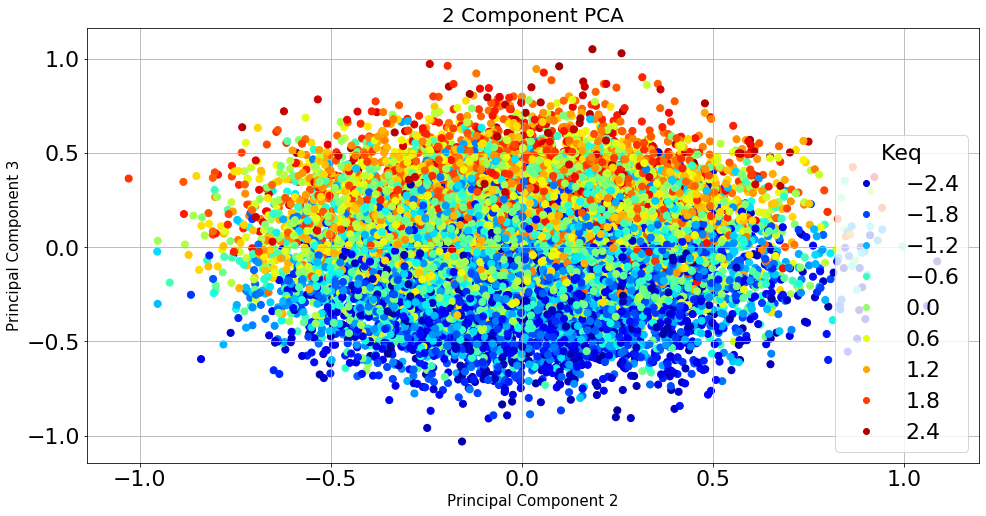

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df['Keq']], axis = 1)
finalDf.head(5)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


scatter = ax.scatter(finalDf['principal component 1']
           , finalDf['principal component 2']
           , c = df['Keq'], cmap='jet'
           , s = 50)

ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Keq")
ax.grid()

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


scatter = ax.scatter(finalDf['principal component 1']
           , finalDf['principal component 3']
           , c = df['Keq'], cmap='jet'
           , s = 50)

ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Keq")
ax.grid()

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


scatter = ax.scatter(finalDf['principal component 2']
           , finalDf['principal component 3']
           , c = df['Keq'], cmap='jet'
           , s = 50)

ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Keq")
ax.grid()


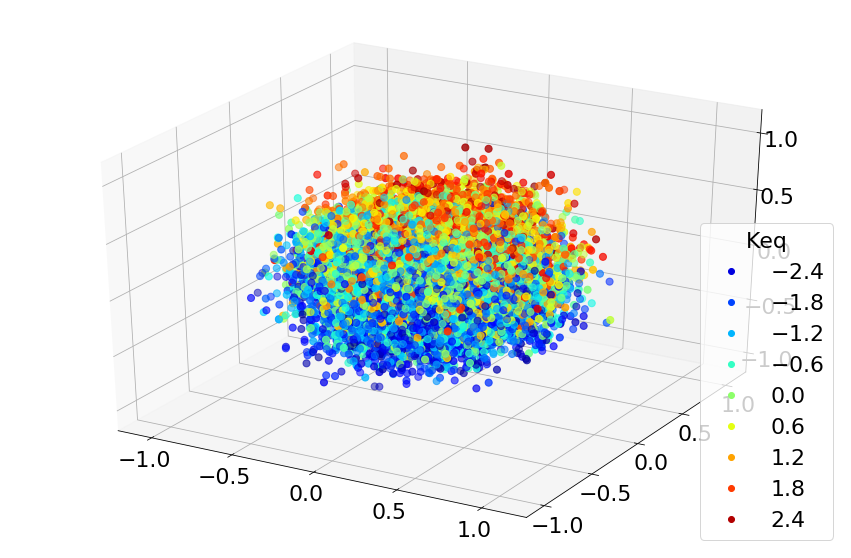

In [14]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(finalDf['principal component 1']
            , finalDf['principal component 2']
           , finalDf['principal component 3']
           , c = df['Keq'], cmap='jet'
           , s = 50)
ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Keq")

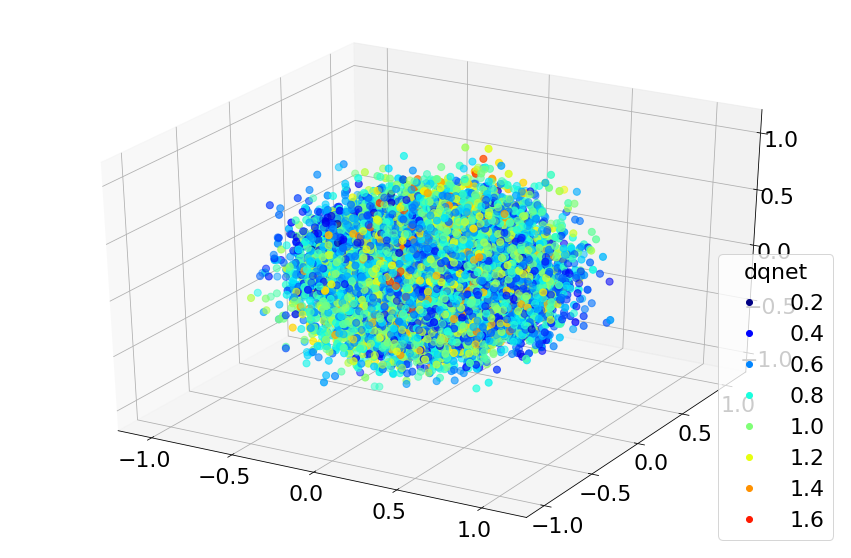

In [15]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter=ax.scatter(finalDf['principal component 1']
            , finalDf['principal component 2']
           , finalDf['principal component 3']
           , c = df['dqnet'], cmap='jet'
           , s = 50)
ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="dqnet")

Experimenting with feature selection
https://blog.datadive.net/selecting-good-features-part-i-univariate-selection/
# Maximal information coefficient

In [4]:
from minepy import MINE
m = MINE()

m.compute_score(X[:,0], Y[:,0])
print(m.mic())

0.10829774922691965


In [8]:
data=[]
for i in range(X.shape[1]):
    local_data=[]
    for j in range(Y.shape[1]):
        m.compute_score(X[:,i], Y[:,j])
        score = m.mic()
        print(f"feature {i}, target {j}: {score}")
        local_data.append(score)
    data.append(local_data)

feature 0, target 0: 0.10829774922691965
feature 0, target 1: 0.06854436832575675
feature 1, target 0: 0.628850898429732
feature 1, target 1: 0.19132214882279008
feature 2, target 0: 0.10003562888439974
feature 2, target 1: 0.08535497115501366
feature 3, target 0: 0.05079543942529305
feature 3, target 1: 0.0548498565792147
feature 4, target 0: 0.05342602935020551
feature 4, target 1: 0.06775708752587256
feature 5, target 0: 0.051648387768327475
feature 5, target 1: 0.0555486061139286
feature 6, target 0: 0.05126058025195801
feature 6, target 1: 0.05645211653446913
feature 7, target 0: 0.056181734756101415
feature 7, target 1: 0.05429566684404927
feature 8, target 0: 0.05186409320431877
feature 8, target 1: 0.051497152839754354
feature 9, target 0: 0.052172726798702836
feature 9, target 1: 0.0992249330956546


[[0.10829775 0.06854437]
 [0.6288509  0.19132215]
 [0.10003563 0.08535497]
 [0.05079544 0.05484986]
 [0.05342603 0.06775709]
 [0.05164839 0.05554861]
 [0.05126058 0.05645212]
 [0.05618173 0.05429567]
 [0.05186409 0.05149715]
 [0.05217273 0.09922493]]


Text(0, 0.5, 'Feature')

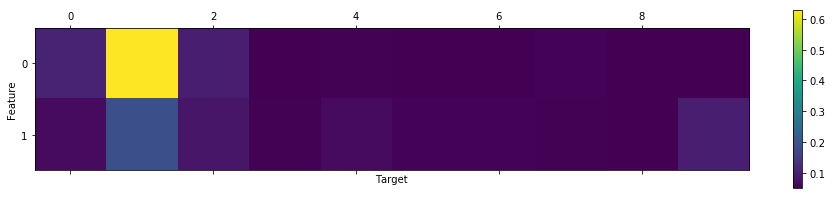

In [28]:
data = np.array([[0.10829775, 0.06854437],
 [0.6288509,  0.19132215],
 [0.10003563, 0.08535497],
 [0.05079544, 0.05484986],
 [0.05342603, 0.06775709],
 [0.05164839, 0.05554861],
 [0.05126058, 0.05645212],
 [0.05618173, 0.05429567],
 [0.05186409, 0.05149715],
 [0.05217273, 0.09922493]])
print(np.array(data))
plt.matshow(data.T)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Feature")

# Pearson Correlation

In [11]:
from scipy.stats import pearsonr
pdata=[]
for i in range(X.shape[1]):
    local_data=[]
    for j in range(Y.shape[1]):
        m.compute_score(X[:,i], Y[:,j])
        score = pearsonr(X[:,i], Y[:,j])
        print(f"feature {i}, target {j}: {score}")
        local_data.append(score)
    pdata.append(local_data)
# note that this one is linear only.

feature 0, target 0: (0.2535454667814535, 1.1785472012633276e-222)
feature 0, target 1: (-0.14148680394283794, 3.998991636862855e-69)
feature 1, target 0: (0.8275059338362504, 0.0)
feature 1, target 1: (0.2713065423030096, 6.927353504120615e-256)
feature 2, target 0: (0.2450685075396022, 1.0748728819430832e-207)
feature 2, target 1: (0.1579032368854699, 7.614495755472251e-86)
feature 3, target 0: (0.002590828216333618, 0.7488476560480665)
feature 3, target 1: (0.00621935105627241, 0.442156532164249)
feature 4, target 0: (0.012884590661491325, 0.11132522997690339)
feature 4, target 1: (-0.07605846113138258, 4.845956757213786e-21)
feature 5, target 0: (0.024213686244320996, 0.002765961638296223)
feature 5, target 1: (0.011255561212786378, 0.16424445507179342)
feature 6, target 0: (0.011048741143304543, 0.17213449064389855)
feature 6, target 1: (0.038731545474610135, 1.6844895347981027e-06)
feature 7, target 0: (0.014530425236438849, 0.07254612646549174)
feature 7, target 1: (-0.006069425

Text(0, 0.5, 'Feature')

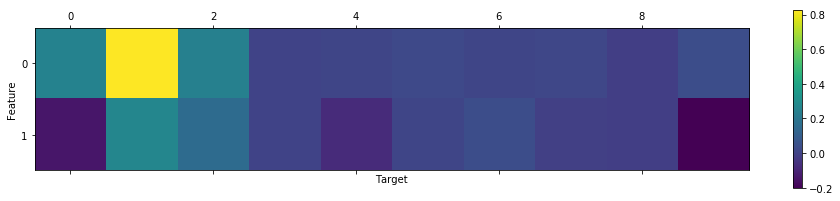

In [23]:
pdata=data
data0 = np.array(data)[:,:,0]
plt.matshow(data0.T)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Feature")



# Distance correlation

In [20]:
# see https://gist.github.com/josef-pkt/2938402
import numpy as np

def dcov_all(x, y):
    def dist(x, y): return np.abs(x[:, None] - y)

    def d_n(x):
        d = dist(x, x)
        dn = d - d.mean(0) - d.mean(1)[:,None] + d.mean()
        return dn
    
    dnx = d_n(x)
    dny = d_n(y)
    
    denom = np.product(dnx.shape)
    dc = (dnx * dny).sum() / denom
    dvx = (dnx**2).sum() / denom
    dvy = (dny**2).sum() / denom
    dr = dc / (np.sqrt(dvx) * np.sqrt(dvy))
    return dc, dr, dvx, dvy

from scipy.stats import pearsonr
ddata=[]
for i in range(X.shape[1]):
    local_data=[]
    for j in range(Y.shape[1]):
        m.compute_score(X[:,i], Y[:,j])
        score = dcov_all(X[:,i], Y[:,j])
        print(f"feature {i}, target {j}: {score}")
        local_data.append(score)
    ddata.append(local_data)

feature 0, target 0: (0.012939874924924093, 0.06654975706387176, 0.044491908536115427, 0.8497402152698814)
feature 0, target 1: (0.00064055112980202, 0.017858518127636048, 0.044491908536115427, 0.028915834433686918)
feature 1, target 0: (0.13018137991234283, 0.6704016299576275, 0.04437531469812562, 0.8497402152698814)
feature 1, target 1: (0.004057302428501097, 0.11326579907712071, 0.04437531469812562, 0.028915834433686918)
feature 2, target 0: (0.012334577444839553, 0.0634943001635263, 0.04441123991086009, 0.8497402152698814)
feature 2, target 1: (0.001135299993904393, 0.03168081326471546, 0.04441123991086009, 0.028915834433686918)
feature 3, target 0: (2.6602866899408382e-05, 0.0001370575696600408, 0.04433683194433929, 0.8497402152698814)
feature 3, target 1: (1.964530165001467e-05, 0.0005486665807691345, 0.04433683194433929, 0.028915834433686918)
feature 4, target 0: (6.632623929424592e-05, 0.0003416442443794792, 0.04435436409914769, 0.8497402152698814)
feature 4, target 1: (0.00030

Text(0, 0.5, 'Feature')

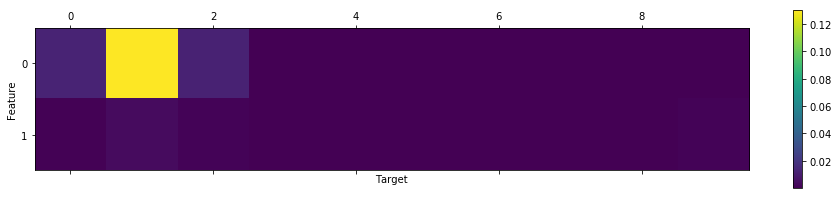

In [22]:
data0 = np.array(ddata)[:,:,0]
plt.matshow(data0.T)
plt.colorbar()
plt.xlabel("Target")
plt.ylabel("Feature")

All three of these say the same thing which must be related to the size, orientation and connectivity of the fractures.

Model based ranking looks intersting